# Link github: 
Bản quyền bài làm thuộc về nhóm. Các hành vi sao chép và sử dụng phải được sự đồng ý của chủ sở hữu

https://github.com/nightfury1103/P4DS-CQ19-FinalProject

# Import

Các thư viện cần thiết cho đồ án này

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  

# Thu thập dữ liệu

## Dữ liệu của bạn là về chủ đề gì 

- Tập dữ liệu đưa ra các mô tả ngắn gọn các thông tin như thời điểm, cường độ, số người thiệt mạng, số người mất tích ,... về các cơn sóng thần xảy ra từ năm 1980 đến năm 2021
- Dữ liệu có tổng cộng 26 cột với các thông tin từ ngày tháng đến các thống kê về mức độ thiệt hại cụ thể như thế nào chúng ta sẽ đi sâu hơn ở các phần dưới.

## Nguồn dữ liệu - Quyền sử dụng

- Dữ liệu sử dụng của notebook được public trên trang web **kaggle** với đường dẫn sau: [link](https://www.kaggle.com/ramjasmaurya/historical-data-of-tsunamis18002021).
- Về vấn đề quyền sử dụng: Tác giả đề cập đến vấn đề quyền sử dụng dựa theo [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/)

**Lưu ý: Các hành vi, vi phạm về quyền sử dụng nêu trên đều không thuộc trách nhiệm của tác giả đồ án này**

## Người ta thu thập dữ liệu như thế nào?

Trong phần mô tả của dữ liệu, tác giả có đề cập đến cách dữ liệu được thu thập bằng cách là thu thập từ trang https://www.ngdc.noaa.gov/hazard/tsu_db.shtml là cơ quan quản trị khí quyển và đại dương quốc gia (National Oceanic and Atmospheric Administration - NOAA) trực thuộc của Mỹ với các cơ sở dữ liệu **Tsunami Runup** và **Tsunami Source Event**

## Mô tả dữ liệu

Như đã nói ở trên thì đây là dữ liệu ngắn gọn về các cơn sóng thần xảy ra từ năm 1800 và 2021. Dưới đây là bản mô tả đầy đủ dữ liệu do tác giả đưa ra. Mặc dù các thông tin cũng sẽ được đề cập ở phần dữ liệu các cột. Nhưng để tôn trọng và biết ơn tác giả trong đồ án này ta sẽ vẫn đưa ra mô tả gốc của tác giả!

DATASET gives brief description of Tsunamis that were happened between the years 1800 to 2021.

Dataset has 26 columns all including from date metrics to measure metrics with its damages.

Some info:

Tsunami Event Database contains information on the source of the tsunami. It is related to the Tsunami Runup database which contains information on locations where tsunami effects occurred.

Tsunami Runup Database contains information on locations where tsunami effects occurred. It is related to the Tsunami Source Event database which contains information on the source of the tsunami.

Tsunami deposits are the physical evidence left behind when a tsunami impacts a shoreline or affects submarine sediments. These deposits can be preserved in the geologic record and studied long after the tsunami waves dissipate.

tsunami marigrams from analog (microfiche) to high-resolution digital images. Microfiche were created in the 1970s from deteriorating paper records. The collection includes records from 1854 to 1981.

# Khám phá dữ liệu

## Đọc dữ liệu

In [77]:
df = pd.read_csv('Data/tsunami.csv')
df.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1800.0,6.0,2.0,20.0,17.0,NaN,2.0,1.0,NaN,0.0,PORTUGAL,AZORES,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1802.0,1.0,4.0,7.0,NaN,NaN,2.0,1.0,NaN,0.0,CROATIA,BAKAR,45.3,14.4,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1802.0,3.0,19.0,NaN,NaN,NaN,2.0,1.0,NaN,0.0,ANTIGUA AND BARBUDA,ANTIGUA ISLAND & ST. CHRISTOPHER,17.2,-62.4,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1802.0,8.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,0.0,UK,SW ENGLAND,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dữ liệu có bao nhiêu dòng và cột ? 

Dựa vào dữ liệu đưa vào ta có thể thấy dữ liệu bị trống ở dòng đầu tiên. Do đó, ta sẽ thực hiệp xóa dòng này trước khi khám phá dữ liệu

In [3]:
df = df.drop(0, axis=0)

In [4]:
n_rows, n_col = df.shape
n_rows, n_col

(2161, 26)

- Dữ liệu có 2161 dòng và 26 cột

## Các dòng dữ liệu

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [5]:
df.iloc[:,0:15]

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m)
1,1800.0,6.0,2.0,20.0,17.0,NaN,2.0,1.0,NaN,0.0,PORTUGAL,AZORES,NaN,NaN,NaN
2,1802.0,1.0,4.0,7.0,NaN,NaN,2.0,1.0,NaN,0.0,CROATIA,BAKAR,45.300,14.400,NaN
3,1802.0,3.0,19.0,NaN,NaN,NaN,2.0,1.0,NaN,0.0,ANTIGUA AND BARBUDA,ANTIGUA ISLAND & ST. CHRISTOPHER,17.200,-62.400,NaN
4,1802.0,8.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,0.0,UK,SW ENGLAND,NaN,NaN,NaN
5,1802.0,8.0,15.0,NaN,NaN,NaN,3.0,1.0,NaN,0.0,VENEZUELA,CUMANA,10.300,-64.500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,2021.0,8.0,11.0,17.0,46.0,14.0,4.0,1.0,7.1,0.0,PHILIPPINES,"MINDANAO ISLAND, PHILIPPINES",6.455,126.742,0.05
2158,2021.0,8.0,12.0,18.0,35.0,20.0,4.0,1.0,8.1,0.0,UK TERRITORY,SOUTHERN ATLANTIC OCEAN,-58.416,-25.321,0.64
2159,2021.0,8.0,14.0,12.0,29.0,8.0,4.0,1.0,7.2,0.0,HAITI,PORT-AU-PRINCE,18.408,-73.475,NaN
2160,2021.0,9.0,8.0,1.0,47.0,47.0,4.0,1.0,7.0,0.0,MEXICO,S. MEXICO,16.982,-99.773,0.48


- Mỗi dòng ứng với thông tin của 1 cơn sóng thần. Có vẻ không có dòng nào "lạc loài" (nghĩa là không có vấn đề các dòng có ý nghĩa khác nhau).

### Dữ liệu các dòng có bị lặp hay không?

In [6]:
df[df.duplicated(keep=False)]

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged
1449,1961.0,10.0,18.0,16.0,51.0,57.0,1.0,1.0,6.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1450,1961.0,10.0,18.0,16.0,51.0,57.0,1.0,1.0,6.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


- Vậy dữ liệu ở dòng 1449 và dòng 1950 bị lặp, ta sẽ xóa dòng 1950.

In [7]:
df.drop_duplicates(keep='first',inplace=True)

## Các cột dữ liệu

### Ý nghĩa các cột

In [8]:
df.columns

Index(['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsunami Event Validity',
       'Tsunami Cause Code', 'Earthquake Magnitude', 'Deposits', 'Country',
       'Location Name', 'Latitude', 'Longitude', 'Maximum Water Height (m)',
       'Number of Runups', 'Tsunami Magnitude (Iida)', 'Tsunami Intensity',
       'Total Deaths', 'Total Missing', 'Total Missing Description',
       'Total Injuries', 'Total Damage ($Mil)', 'Total Damage Description',
       'Total Houses Destroyed', 'Total Houses Damaged'],
      dtype='object')


|Column|Description|
|----------- |----------- |
|Year|Thời điểm xảy ra sóng thần đơn vị năm.|
|Mo|Thời điểm xảy ra sóng thần đơn vị tháng.|
|Dy|Thời điểm xảy ra sóng thần đơn vị ngày.|
|Hr|Thời điểm xảy ra sóng thần đơn vị giờ.|
|Mn|Thời điểm xảy ra sóng thần đơn vị phút.|
|Sec|Thời điểm xảy ra sóng thần đơn vị giây.|
|Tsunami Event Validity|Độ chuẩn xác của sóng thần **(-1 - 4)** , giá trị càng lớn thì càng chuẩn xác|
|Tsunami Cause Code|Mã nguyên nhân xảy ra sóng thần. **(0 - 11)**|
||1: **động đất**,6: **núi lửa**, 8: **lở đất**
|Earthquake Magnitude|Mức độ tàn phá của động đất (đơn vị Richter).|
|Deposits|Trầm tích sóng thần(trầm tích lắng đọng do kết quả của sóng thần).|
|Country|Đất nước xảy ra sóng thần.|
|Location Name|Địa điểm xảy ra sóng thần (thường là nơi chịu thiệt hại nặng nhất)|
|Latitude|Vĩ độ xảy ra sóng thần.|
||0-90: **bắc bán cầu**; -90-0: **nam bán cầu**
|Longitude|Kinh độ xảy ra sóng thần.|
||0-180: **đông bán cầu**; -180-0: **tây bán cầu**
|Maximum Water Height (m)|Độ cao đạt đỉnh của sóng thần đơn vị mét.|
|Number of Runups|Số địa điểm mà 1 cơn sóng thần tràn vào bờ|
|Tsunami Magnitude (Abe)|Kích cỡ của sóng thần|
|Tsunami Intensity (lida)|Cường độ của sóng thần|
|Total Deaths|Tổng số người chết|
|Total Missing|Tổng số người mất tích|
|Total Missing Description|Mã mô tả tổng số người mất tích **(0-4)**, giá trị càng lớn thiệt hại càng nhiều|
|Total Injuries|Tổng số người bị thương|
|Total Damage ($Mil)|Tổng số thiệt hại (đơn vị 1,000,000 đô la Mỹ)|
|Total Damage Description|Mã mô tả tổng số thiệt hại **(0-4)**, giá trị càng lớn thiệt hại càng nhiều|
|Total Houses Destroyed|Tổng số ngôi nhà bị phá hủy|
|Total Houses Damaged|Tổng số ngôi nhà bị hư hại|

**Lưu ý:** Thông tin các cột có thể bị sai lệch có thể cách hiểu của từng người khác nhau.
Để mang tính khách quan khuyến khích người đọc nên tham khảo nguồn thông tin bằng tiếng Anh chính thức.
Thông tin các cột có thể đọc thêm tại trang web sau: https://www.ngdc.noaa.gov/hazel/view/hazards/tsunami/event-more-info/2439

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [78]:
df_train = df.copy()
df_train['HasDeposits'] = pd.Series(len(df_train['Deposits']), index=df_train.index)
df_train['HasDeposits'] = 0 
df_train.loc[df_train['Deposits']>0,'HasDeposits'] = 1
df_train.head()

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged,HasDeposits
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1800.0,6.0,2.0,20.0,17.0,NaN,2.0,1.0,NaN,0.0,PORTUGAL,AZORES,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1802.0,1.0,4.0,7.0,NaN,NaN,2.0,1.0,NaN,0.0,CROATIA,BAKAR,45.3,14.4,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1802.0,3.0,19.0,NaN,NaN,NaN,2.0,1.0,NaN,0.0,ANTIGUA AND BARBUDA,ANTIGUA ISLAND & ST. CHRISTOPHER,17.2,-62.4,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1802.0,8.0,10.0,NaN,NaN,NaN,1.0,0.0,NaN,0.0,UK,SW ENGLAND,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [100]:
df['Deposits'].value_counts()

0.0      2021
1.0        91
2.0        13
3.0        10
4.0         6
8.0         4
6.0         3
5.0         2
20.0        2
10.0        2
144.0       1
9.0         1
11.0        1
26.0        1
7.0         1
14.0        1
19.0        1
Name: Deposits, dtype: int64

<AxesSubplot:>

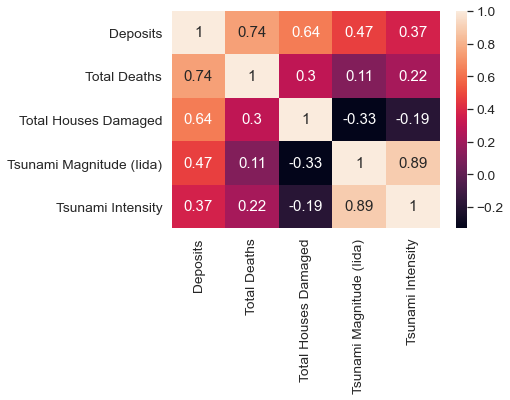

In [104]:
df1 = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df1.loc[df1['Deposits'] > 0]
non_fraud_df = df1.loc[df1['Deposits'] == 0][:140]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

corrmat = new_df.corr()
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Deposits')['Deposits'].index
# cols = corrmat.nlargest(k, 'Number of Runups')['Number of Runups'].index
corrmat = new_df[cols].corr()
# cm = np.corrcoef(df_train[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()
sns.heatmap(corrmat, annot=True)

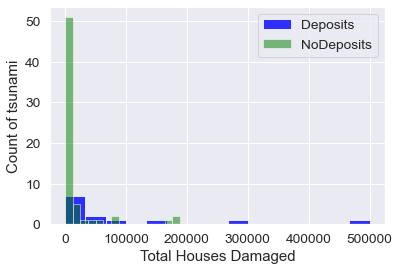

In [99]:
fig, ax = plt.subplots()

ax.hist(df[df["Deposits"]>0]["Total Houses Damaged"], bins=15, alpha=0.8, color="blue", label="Deposits")
ax.hist(df[df["Deposits"]==0]["Total Houses Damaged"], bins=15, alpha=0.5, color="green", label="NoDeposits")

#alpha la do mo cua histogram
ax.set_xlabel("Total Houses Damaged")
ax.set_ylabel("Count of tsunami")


ax.legend();

<AxesSubplot:>

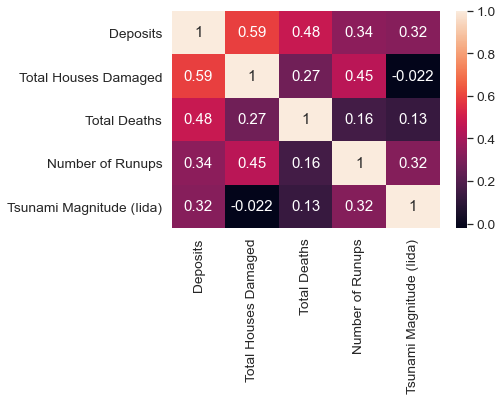

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 1 to 2161
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       2160 non-null   float64
 1   Mo                         2111 non-null   float64
 2   Dy                         2053 non-null   float64
 3   Hr                         1337 non-null   float64
 4   Mn                         1288 non-null   float64
 5   Sec                        940 non-null    float64
 6   Tsunami Event Validity     2160 non-null   float64
 7   Tsunami Cause Code         2157 non-null   float64
 8   Earthquake Magnitude       1292 non-null   float64
 9   Deposits                   2160 non-null   float64
 10  Country                    2160 non-null   object 
 11  Location Name              2158 non-null   object 
 12  Latitude                   1891 non-null   float64
 13  Longitude                  1891 non-null   float

Các dữ liệu đều đã ở dạng phù hợp để xử lý

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào

Với các cột có kiểu dữ liệu số, ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

In [11]:
def calculate_quartile(data):
    nume_col_info_df = pd.DataFrame()
    for col in data.keys():
        if data[col].dtype in [np.int64, np.float64] :
            missing = data[col].isnull().sum()
            missing_percentage = round(data[col].isnull().sum() * 100 / len(data[col]), 1)
            min_value = data[col].min()
            lower_quartile = data[col].quantile(0.25)
            median = data[col].median()
            upper = data[col].quantile(0.75)
            max_value = data[col].max()
            row_line = pd.Series([missing,missing_percentage, min_value, lower_quartile, median, upper, max_value], 
                                 index = ['num_missing','missing_percentage', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
            nume_col_info_df[col] = row_line
    return nume_col_info_df

In [12]:
info_df = calculate_quartile(df)
info_df

,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,Deposits,...,Tsunami Magnitude (Iida),Tsunami Intensity,Total Deaths,Total Missing,Total Missing Description,Total Injuries,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Damaged
num_missing,0.0,49.0,107.0,823.0,872.0,1220.0,0.0,3.0,868.0,0.0,...,1584.00,1263.00,1668.00,2149.0,2147.0,1879.0,2017.0000,1254.0,1963.0,2083.0
missing_percentage,0.0,2.3,5.0,38.1,40.4,56.5,0.0,0.1,40.2,0.0,...,73.30,58.50,77.20,99.5,99.4,87.0,93.4000,58.1,90.9,96.4
min,1800.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,3.7,0.0,...,-4.64,-4.14,1.00,1.0,1.0,1.0,0.0030,1.0,1.0,2.0
lower_quartile,1877.0,4.0,8.0,5.0,14.0,10.8,1.0,1.0,6.5,0.0,...,-1.00,0.00,4.00,20.0,1.0,16.0,2.4125,1.0,50.0,127.0
median,1927.0,7.0,16.0,11.0,29.0,25.7,3.0,1.0,7.0,0.0,...,0.70,1.00,24.50,100.0,2.0,100.0,39.0000,2.0,588.0,1000.0
upper_quartile,1977.0,10.0,23.0,18.0,43.0,42.0,4.0,1.0,7.6,0.0,...,2.00,2.00,262.75,498.0,3.0,500.0,520.0000,3.0,5043.0,10044.0
max,2021.0,12.0,31.0,23.0,59.0,59.9,4.0,11.0,9.5,144.0,...,8.40,9.00,316000.00,43476.0,4.0,374171.0,220136.6000,4.0,5360000.0,500000.0


#### Số-lượng/tỉ-lệ các giá trị thiếu?

In [13]:
pd.DataFrame([info_df.loc['num_missing'],info_df.loc['missing_percentage']]).transpose()

,num_missing,missing_percentage
Year,0.0,0.0
Mo,49.0,2.3
Dy,107.0,5.0
Hr,823.0,38.1
Mn,872.0,40.4
Sec,1220.0,56.5
Tsunami Event Validity,0.0,0.0
Tsunami Cause Code,3.0,0.1
Earthquake Magnitude,868.0,40.2
Deposits,0.0,0.0


#### Min? max? → Có gì bất thường không?

In [14]:
pd.DataFrame([info_df.loc['min'],info_df.loc['max']]).transpose()

,min,max
Year,1800.000,2021.000
Mo,1.000,12.000
Dy,1.000,31.000
Hr,0.000,23.000
Mn,0.000,59.000
Sec,0.000,59.900
Tsunami Event Validity,-1.000,4.000
Tsunami Cause Code,0.000,11.000
Earthquake Magnitude,3.700,9.500
Deposits,0.000,144.000


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu không phải số, ta sẽ tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu) 

- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %; với cột mà ứng với câu hỏi dạng multichoice, cách làm tương tự như ở trên

**Lưu ý, ta sẽ đưa cả các cột có dạng số nhưng có ít hơn 15 giá trị khác nhau vào dạng categorical**

In [54]:
unique_counts = df.nunique()
lowest_distinct = unique_counts < 15
lowest_distinct = unique_counts[lowest_distinct == True]
cat = lowest_distinct.drop('Total Missing').index.tolist()
cat.extend(df.select_dtypes(include=['object']).columns.tolist())
cat

['Mo',
 'Tsunami Event Validity',
 'Tsunami Cause Code',
 'Total Missing Description',
 'Total Damage Description',
 'Country',
 'Location Name']

Trừ cột **Total Missing** (vì cột này thống kế tổng số người mất tích sau mỗi trận sóng thần nên không thể là categorical) thì các cột còn lại đều có thể xét vào dạng categorical

In [55]:
missing = [];missing_percentage=[];num_values=[];value_percentages=[]

for column in cat:
    missing.append(df[column].isnull().sum())
    missing_percentage.append((df[column].isnull().sum() * 100 / len(df)).round(1))
    temp = df[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cat_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=list(cat))
cat_info_df

,Mo,Tsunami Event Validity,Tsunami Cause Code,Total Missing Description,Total Damage Description,Country,Location Name
num_missing,49,0,3,2147,1254,0,2
missing_percentage,2.3,0.0,0.1,99.4,58.1,0.0,0.1
num_values,12,6,12,4,4,104,797
value_percentages,"{8.0: 10.6, 11.0: 9.6, 1.0: 9.0, 5.0: 8.8, 3.0...","{4.0: 38.5, 2.0: 19.2, 1.0: 16.7, 3.0: 15.3, -...","{1.0: 70.5, 0.0: 9.7, 8.0: 4.8, 3.0: 4.5, 6.0:...","{1.0: 46.2, 3.0: 38.5, 4.0: 7.7, 2.0: 7.7}","{1.0: 38.5, 2.0: 27.9, 3.0: 19.1, 4.0: 14.5}","{'USA': 12.0, 'INDONESIA': 10.6, 'JAPAN': 10.4...","{'NORTHERN CHILE': 3.3, 'CENTRAL CHILE': 2.4, ..."


#### Số-lượng/tỉ-lệ các giá trị thiếu?

In [20]:
pd.DataFrame([cat_info_df.loc['num_missing'],cat_info_df.loc['missing_percentage']]).transpose()

,num_missing,missing_percentage
Mo,49.0,2.3
Tsunami Event Validity,0.0,0.0
Tsunami Cause Code,3.0,0.1
Total Missing,2149.0,99.5
Total Missing Description,2147.0,99.4
Total Damage Description,1254.0,58.1


#### Số lượng các giá trị khác nhau? Show một vài giá trị → Có gì bất thường không?

In [59]:
country_df = pd.DataFrame([cat_info_df['Country']['value_percentages']])
country_df.T.head(10)

,0
USA,12.0
INDONESIA,10.6
JAPAN,10.4
CHILE,6.9
GREECE,5.2
ITALY,4.2
RUSSIA,4.2
NEW ZEALAND,4.0
PHILIPPINES,3.7
PAPUA NEW GUINEA,3.5


In [ ]:
pd.DataFrame([cat_info_df['Location Name']['value_percentages']]).T.head(10)

In [ ]:
pd.DataFrame([cat_info_df['Tsunami Cause Code']['value_percentages']]).T.head(10)

- Có vẻ dữ liệu đều ổn không có gì bất thường xảy ra ở đây

# Đưa ra các câu hỏi có ý nghĩa cần trả lời

| Câu hỏi  | Ý nghĩa |
| --- | --- |
| Theo thời gian, số lượng, kích cỡ cũng như cường độ của các cơn sóng thần thay đổi ntn? (mức độ thiệt hại ) <——> | Những năm gần đây, liệu ảnh hưởng của biến đổi khí hậu có làm cho các cơn sóng thần xuất hiện nhiều hơn hay tàn phá mạnh hơn hay không. |
| Sự khác nhau về nguyên nhân xảy ra sóng thần (hoặc mức độ thiệt hại) ở bắc bán cầu và nam bán cầu (hoặc tây bán cầu và đông bán cầu) | Nguyên nhân: Để phần nào đó có thể dự báo trước khả năng xuất hiện sóng thần. So sánh xem cùng nằm trên trái đất nhưng 2 bán cầu liệu có nguyên nhân xảy ra khác nhau hay không?                    |
| Những nước nào hay xảy ra sóng thần nhất? Nếu có thì thường vào tháng nào, do nguyên nhân nào?   ←——>  | Giúp ta phần nào đó chọn địa điểm du lịch cũng như thời gian du lịch hợp lý để chuyến đi chơi an toàn hơn |
| Có phải kích cỡ và cường độ , độ xác thực sóng thần càng lớn thì sóng thần càng dễ tràn vào bờ hay không  | Dự báo được các trường hợp nguy hiểm từ đó di dân kịp thời  |
| Nguyên nhân nào thường gây ra việc sóng thần tràn vào bờ (hoặc nguyên nhân gây ra thiệt hại nhiều nhất) ←——> | Để có thể di dời dân cư kịp thời phòng ngừa các tình huống bất ngờ ập đến |
| Phần lớn các cuộc sóng thần xảy ra vì động đất, vậy cường độ của động đất có ảnh hưởng nhiều đến độ cao đạt đỉnh của sóng thần và tổng thiệt hại hay không | Tìm mối tương quan giữa động đất và sóng thần |

## Câu hỏi - Lợi ích

# Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

# Nhìn lại quá trình làm đồ án

## Những khó khăn

## Học được gì hữu ích

## Nếu có thêm thời gian sẽ làm gì

# Tài liệu tham khảo